In [71]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

In [72]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [73]:
train_labels[0]

1

In [74]:
max([max(sequence) for sequence in train_data])

9999

In [75]:
#Encoding integer sequences into binary matrix (1 and 0's)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):  #creat an all zero matrix of shape
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #sets specific indices of results [i] to 1s
    return results
    
x_train = vectorize_sequences(train_data) #vectors
x_test = vectorize_sequences(test_data)

In [76]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [77]:
#Vectorize Labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [9]:
#Simple 3 layer network (Dense layer 16) w/relu(zero out functions) and sigmoid(squashes arbitraty values into [0,1] interval) as activation functions 

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
#compiling the model for binary classification when output will be probability 
#loss will be binary_crossentropy loss because it measures distance between probability distribtutions (ground truth distribution and your predictions)
#optimizer will be rmsprop 


from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
#customizing losses and metrics 

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
#setting aside a validation set of 10,000 samples 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#Training model for 20 epochs, 512 minibatches while monitoring loss and accuracy of the 10,000 samples by passing validation data arguement 

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 368us/step - loss: 0.5002 - acc: 0.7976 - val_loss: 0.3848 - val_acc: 0.8641
Epoch 2/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.3030 - acc: 0.9043 - val_loss: 0.3469 - val_acc: 0.8547
Epoch 3/20
15000/15000 [==============================] - 4s 280us/step - loss: 0.2267 - acc: 0.9262 - val_loss: 0.2922 - val_acc: 0.8837
Epoch 4/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.1790 - acc: 0.9428 - val_loss: 0.2780 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.1454 - acc: 0.9556 - val_loss: 0.2791 - val_acc: 0.8893
Epoch 6/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.1196 - acc: 0.9635 - val_loss: 0.3124 - val_acc: 0.8783
Epoch 7/20
15000/15000 [==============================] - 4s 298us/step - loss: 0.0979 - acc: 0.9720 - val_loss: 0.3145 - 

In [14]:
#History object that is dictionary containing data about what happened in training 

history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

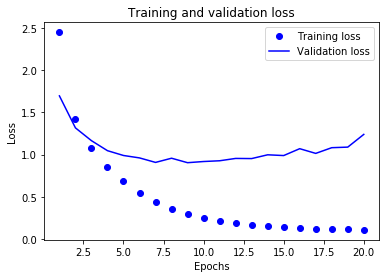

In [64]:
#Plot training and validation loss 
#“bo” is for “blue dot.”
#“b” is for “solid blue line.”
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

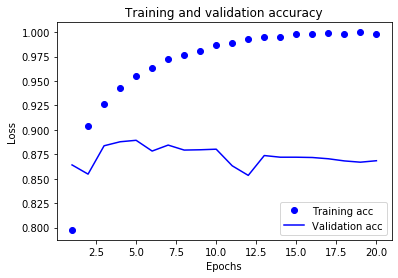

In [63]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


- the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient- descent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfit- ting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In [78]:
#Retraining model from scratch 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 5s 194us/step - loss: 0.4745 - accuracy: 0.8200
Epoch 2/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.2747 - accuracy: 0.9074
Epoch 3/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.2077 - accuracy: 0.9273
Epoch 4/4
25000/25000 [==============================] - 5s 212us/step


In [37]:
results

[0.29578997591018674, 0.8828799724578857]

In [36]:
model.predict(x_test)

array([[0.24687119],
       [0.9998447 ],
       [0.9565113 ],
       ...,
       [0.2113786 ],
       [0.08021588],
       [0.73926014]], dtype=float32)

- You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
- Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

- classify vector inputs into two mutually exclu- sive classes using a densely connected neural network. 

In [79]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)




Epoch 1/4
25000/25000 [==============================] - 6s 245us/step - loss: 0.4881 - accuracy: 0.8182
Epoch 2/4
25000/25000 [==============================] - 5s 195us/step - loss: 0.3123 - accuracy: 0.9002
Epoch 3/4
25000/25000 [==============================] - 4s 160us/step - loss: 0.2431 - accuracy: 0.9192
Epoch 4/4
25000/25000 [==============================] - 5s 204us/step


In [80]:

from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,))) model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu')) model.add(layers.Dense(1, activation='sigmoid'))

SyntaxError: invalid syntax (<ipython-input-80-8f038e80e98c>, line 4)

In [83]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.5908 - accuracy: 0.6884
Epoch 2/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.4388 - accuracy: 0.8247
Epoch 3/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.3544 - accuracy: 0.8706
Epoch 4/4
25000/25000 [==============================] - 5s 215us/step
